In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("C:/Users/Yashit/Downloads/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<Axes: >

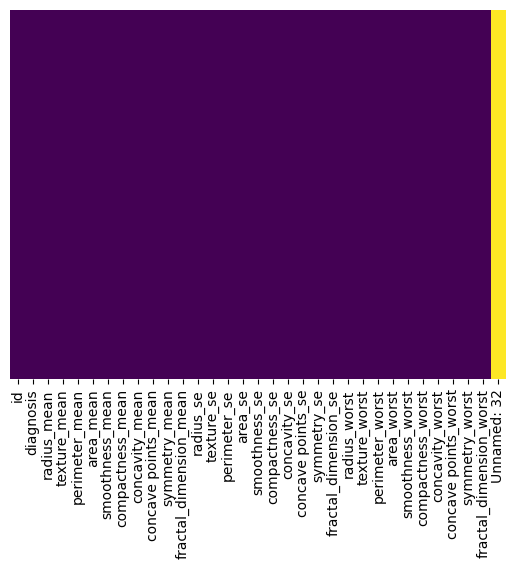

In [2]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [3]:
#Train/test split and standardize features.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Standardize features (fit on train, transform both)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
#Fit a Logistic Regression model.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and fit the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

Test Accuracy: 0.9825

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



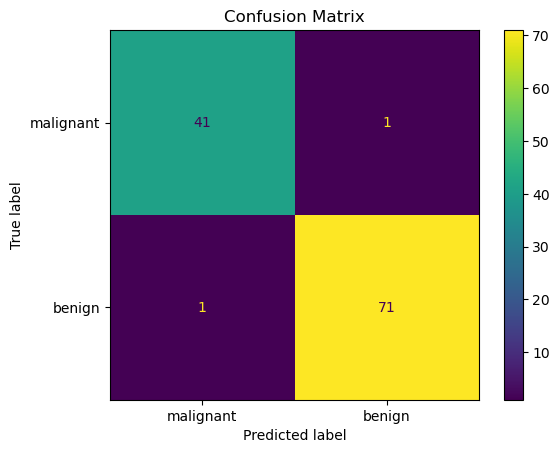

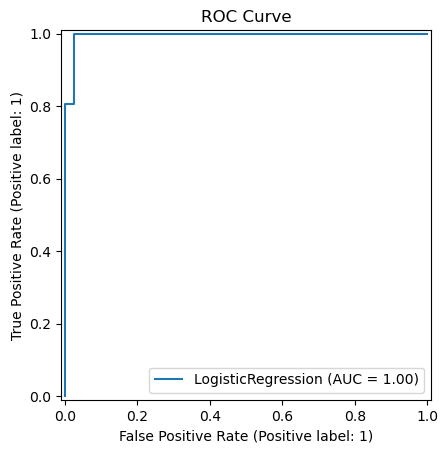

Precision: 0.9861
Recall:    0.9861
ROC-AUC:   0.9954


In [5]:
#Evaluate with confusion matrix, precision, reca l, ROC-AUC

from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, roc_auc_score,
    ConfusionMatrixDisplay, RocCurveDisplay
)
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# ROC-AUC Score
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class
roc_auc = roc_auc_score(y_test, y_proba)

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()

# Print metrics
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

In [6]:
##Tune threshold and explain sigmoid function

# Get predicted probabilities
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Define custom threshold
threshold = 0.3  # Example: lower threshold to catch more positives (higher recall)

# Apply threshold to get new predictions
y_pred_custom = (y_proba >= threshold).astype(int)

# Recalculate metrics
precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)
roc_auc_custom = roc_auc_score(y_test, y_proba)  # Stays same for any threshold

print(f"Custom Threshold = {threshold}")
print(f"Precision: {precision_custom:.4f}")
print(f"Recall:    {recall_custom:.4f}")
print(f"ROC-AUC:   {roc_auc_custom:.4f}")

Custom Threshold = 0.3
Precision: 0.9730
Recall:    1.0000
ROC-AUC:   0.9954


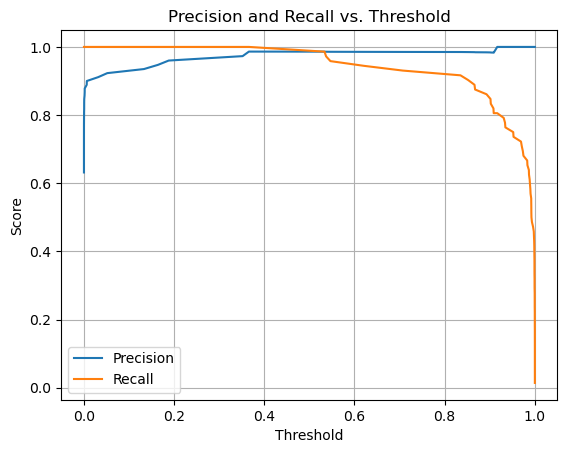

In [7]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()